# Percolation Project Group 1

### Always run this cell before working on the code

In [ ]:
# Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as inter
import scipy.optimize as opt

# Part 1 (core): A Visualisation of a Randomly Coloured Yellow and Blue Grid

In [8]:
def generate_grid(grid_size, p_yellow):
    '''
    Given grid size and probability of a square being yellow, this outputs
    a numpy array of booleans, with true representing yellow
    '''
    
    colours = np.random.rand(grid_size, grid_size)  # Initialise 2d array of random numbers between 0 and 1
    colours = colours < p_yellow  # Sets each cell to True if it's less than p_yellow, else False.
    return colours
    

In [7]:
def display_grid(grid):
    '''
    Given a grid generated by our function 'generate_grid' this function displays our grid with yellow and blue squares
    '''
    
    plt.figure(figsize=(6,6))  #set appropriate figure size
    plt.pcolor(grid, cmap="plasma")  # Makes the graph a rectangular grid plot with yellow and blue colour scheme
    plt.gca().set_aspect('equal')   #set equal aspect ratio
    plt.plot() #Plots the grid
    plt.title("Percolation Grid")
    plt.show()
    return None


Running the code below we can display a $100\times100$ grid where the probability of a square being yellow is $0.6$

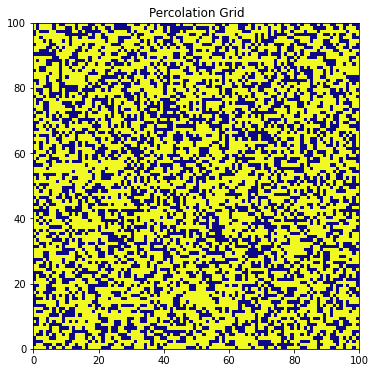

In [50]:
mygrid = generate_grid(100, 0.6)
display_grid(mygrid)

# Part 2 & 3 (core): Finding a Yellow Path From Left to Right on Our Grid

In [11]:
def find_display_path(grid,show_path=False):
    '''
    For a numpy array of booleans (the yellow/blue grid), this function returns True or False
    depending on whether or not a yellow path exists from the left to the right edge.
    It will also display the path.
    '''
    
    # we find the size of the grid and initialise variables giving us the side lengths
    grid_size = np.shape(grid)
    x_length = grid_size[1]
    y_length = grid_size[0]
    # we make an array of the same size as the grid to store
    # which squares we can reach. Initially we assume we can't reach any
    # 0 represents a square is unreachable
    reachable = np.full(grid_size, 0)
    # 'yellows' is a list of arrays which contain the coordinates of each yellow square
    yellows = np.argwhere(grid == True)
    
    # we store the x and y coordinates of the points in 'yellows' in seperate arrays within a larger array 'yellows_xy' 
    yellows_xy = np.array(yellows).T

    # we find the indices in the x coordinate array of each yellow in the left hand column of the grid
    indices = np.where(yellows_xy[1] == 0)

    # using the indices we found we now find the corresponding y coordinate of these yellow squares in the first column
    # we iterate over each index assigning 1 to reachable[y,0] where [y,0] is yellow.
    # 1 signifies a yellow reachable square in reachable while all currently unreached squares are 0
    for i in (indices[0]):
        reachable[yellows_xy[0][i], 0] = 1
    
    # we create an array of all coordinates of sites already checked in the form of a list of lists
    reachable_array = np.asarray(np.where(reachable == 1)).T.tolist()

    # now we search for adjacent yellow squares to the ones we already have
    # we iterate over our array of coordinates of reachable squares.
    # we assign y and x for each squares so that we can later compare to adjacent sites
    for square in reachable_array:
        y = square[0]
        x = square[1]
        # As soon as a site on the RHS is shown to be reachable we return True
        if 1 in reachable[:,x_length-1]:
            # We display the grid with yellow squares those that we know to be reachable
            display_grid(reachable)
            return True
        # check adjacent
        # the first ifs in each part stops us getting index out of bounds errors
        # we check !=1 because otherwise we'd find the same squares again
        # and it would loop forever
        else:
            if x<x_length-1:
                #checks right
                if grid[y,x+1] == True and reachable[y,x+1] != 1:
                    reachable[y,x+1] = 1
                    reachable_array.append([y,x+1])
            if y-1>=0:
                #checks below
                if grid[y-1,x] == True and reachable[y-1,x] != 1:
                    reachable[y-1,x] = 1
                    reachable_array.append([y-1,x])
            if y<y_length-1:
                #checks above
                if grid[y+1,x] == True and reachable[y+1,x] != 1:
                    reachable[y+1,x] = 1
                    reachable_array.append([y+1,x])
            if x-1>=0:
                #checks left
                if grid[y,x-1] == True and reachable[y,x-1] != 1:
                    reachable[y,x-1] = 1
                    reachable_array.append([y,x-1])
    
    # We display the grid with yellow squares those that we know to be reachable
    display_grid(reachable)
    # Return False if no further reachable path is found and we have not reached the right hand side of the grid
    return False

Running the code below finds a path from the left hand side to the right hand side of the grid generated above. We display the reachable yellow squares that were checked while finding this path. The output is a Boolean value, True if there is a path and False otherwise.

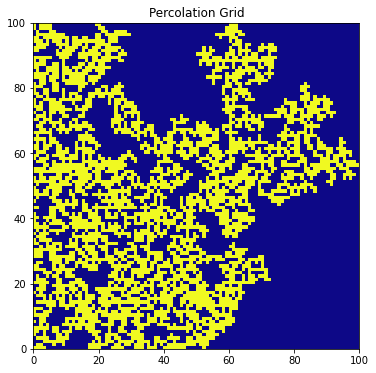

True

In [51]:
find_display_path(mygrid)

In [14]:
# For the sake of performance this function is not able to display the path but is otherwise the same as find_display_path
def find_path_across(grid):
    '''
    For a numpy array of booleans (the yellow/blue grid), this function returns True or False
    depending on whether or not a yellow path exists from the left to the right edge.
    '''
    
    # we find the size of the grid and initialise variables giving us the side lengths
    grid_size = np.shape(grid)
    x_length = grid_size[1]
    y_length = grid_size[0]
    # we make an array of the same size as the grid to store
    # which squares we can reach. Initially we assume we can't reach any
    # 0 represents a square is unreachable
    reachable = np.full(grid_size, 0)
    # 'yellows' is a list of arrays which contain the coordinates of each yellow square
    yellows = np.argwhere(grid == True)
    
    # we store the x and y coordinates of the points in 'yellows' in seperate arrays within a larger array 'yellows_xy'
    yellows_xy = np.array(yellows).T

    # we find the indices in the x coordinate array of each yellow in the left hand column of the grid
    indices = np.where(yellows_xy[1] == 0)

    # using the indices we found we now find the corresponding y coordinate of these yellow squares in the first column
    # we iterate over each index assigning 1 to reachable[y,0] where [y,0] is yellow.
    # 1 signifies a yellow reachable square in reachable while all currently unreached squares are 0
    for i in (indices[0]):
        reachable[yellows_xy[0][i], 0] = 1
    
    # we create an array of all coordinates of sites already checked in the form of a list of lists
    reachable_array = np.asarray(np.where(reachable == 1)).T.tolist()

    # now we search for adjacent yellow squares to the ones we already have
    # we iterate over our array of coordinates of reachable squares.
    # we assign y and x for each squares so that we can later compare to adjacent sites
    for square in reachable_array:
        y = square[0]
        x = square[1]
        # As soon as a site on the RHS is shown to be reachable we return True
        if 1 in reachable[:,x_length-1]:
            return True
        #check adjacent
        #the first ifs in each part stops us getting index out of bounds errors
        #we check !=1 because otherwise we'd find the same squares again
        #and it would loop forever
        else:
            if x<x_length-1:
                #checks right
                if grid[y,x+1] == True and reachable[y,x+1] != 1:
                    reachable[y,x+1] = 1
                    reachable_array.append([y,x+1])
            if y-1>=0:
                #checks below
                if grid[y-1,x] == True and reachable[y-1,x] != 1:
                    reachable[y-1,x] = 1
                    reachable_array.append([y-1,x])
            if y<y_length-1:
                #checks above
                if grid[y+1,x] == True and reachable[y+1,x] != 1:
                    reachable[y+1,x] = 1
                    reachable_array.append([y+1,x])
            if x-1>=0:
                #checks left
                if grid[y,x-1] == True and reachable[y,x-1] != 1:
                    reachable[y,x-1] = 1
                    reachable_array.append([y,x-1])
    
    # Return False if after no further reachable path is found and we have not reached the right hand side of the grid
    return False

The code below does the same as the `find_display_path` function but does not display the path. It only returns the Boolean output checking whether a path exists.

In [15]:
find_path_across(mygrid)

True

As we can see from the tests below it is faster to not display the grid so for our computationally intensive plots below we will not use a function that displays the grid everytime.

In [16]:
%timeit find_path_across(mygrid)

37.5 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


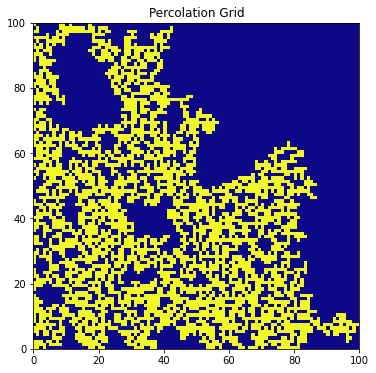

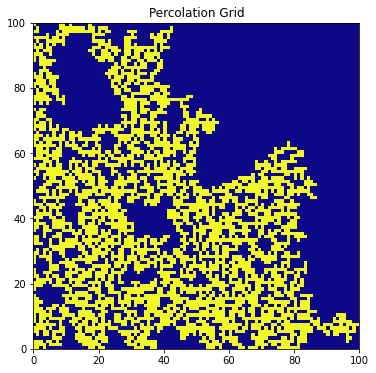

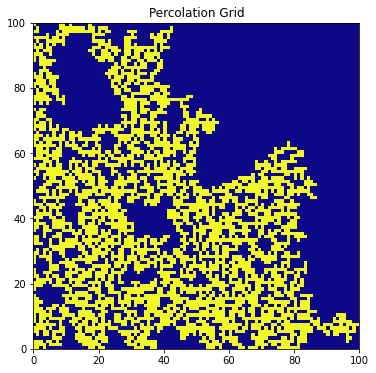

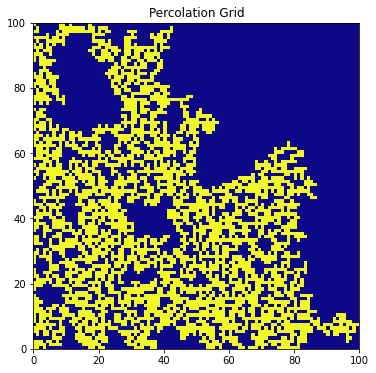

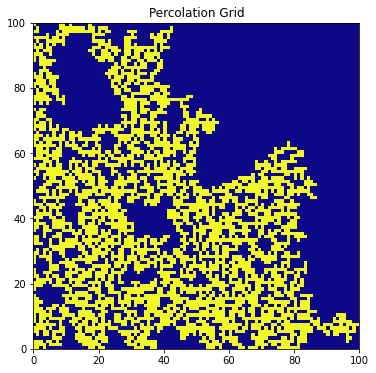

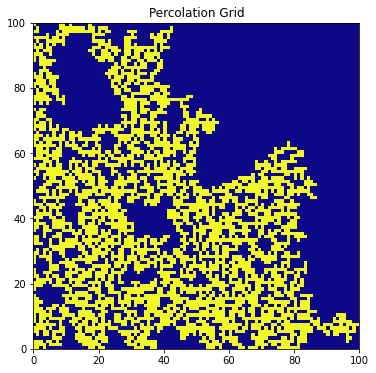

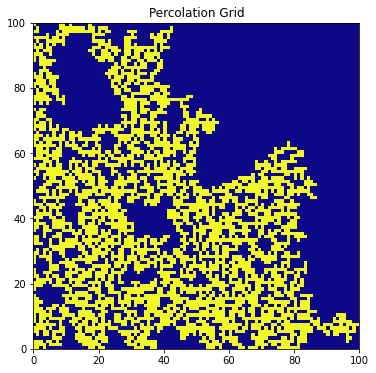

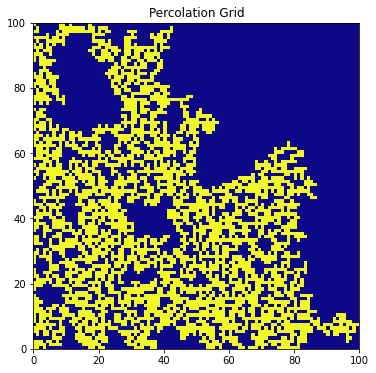

387 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%timeit find_display_path(mygrid)

# Part 4 (core): Finding the Limit $F(p) = \lim_{n\to\infty} F_n(p)$ and Estimating the Critical Point $P_c$

For a grid of size $n\times n$ and a probability of yellow squares $p$, we define:
$F_n(p) = \mathbb{P}$(there is a yellow path connecting the left and right sides of the grid).\
The function below estimates this probability for a given $n$, $p$ and number of trials. We also pass an argument `grid_type` to be used later.
We are most interested in $F(p) = \lim_{n\to\infty} F_n(p)$ as we can then define our critical point $P_c$ to be as follows:\
$F(p) = \begin{cases}
0, & p < p_c\\
1, & p > p_c
\end{cases}$

In [21]:
def Fn(trials, n, p, grid_type):
    '''
    This function finds Fn (the probability of a path from left to right) for a given grid size and probability of yellows.
    This is an estimate based on the number of successful vs unsuccessful trials.
    '''
    # we initialise a count function to note the trials which succeed in finding a path
    count = 0
    
    # we iterate 'trials' number of times, each time creating a grid and checking whether there is a path from left to right
    for i in range(trials):
        grid = grid_type(n, p)
        # when there is a path we increase 'count' by 1
        if find_path_across(grid):
            count += 1
    # we return the probability of finding a path, the number of successful trials divided by the total number of trials
    return 1.0 * count/trials

The function below plots a graph of $F_n$ for given $n$ against probabilities $p$ in the range $[0.5, 0.7]$.\
Our first attempt at estimating $P_c$ is to find the probability on the $x$-axis which corresponds to $F_n = 0.5$ on the $y$-axis through interpolation.

In [60]:
# This function plots Fn against the yellow probabilities for 3 grid sizes
# It also finds an estimate of Pc by finding the interpolated x value corresponding to y=0.5    
def Pc_at_0_5(trials, n1, n2, n3, grid_type):
    
    # We find Fn at all 3 n's for 20 equally spaced probabilities between 0.5 and 0.7
    x_vals = np.linspace(0.5, 0.7, 20)    
    y_vals1 = np.array([Fn(trials, n1, p, grid_type) for p in x_vals])
    y_vals2 = np.array([Fn(trials, n2, p, grid_type) for p in x_vals])
    y_vals3 = np.array([Fn(trials, n3, p, grid_type) for p in x_vals])
    
    # Our estimate for Pc using the x value corresponding to y=0.5
    Pc = np.interp(0.5, y_vals1, x_vals)
    
    # Plot of all three curves of Fn and our estimate of Pc
    plt.plot(x_vals, y_vals1, color='green', label=f'$n={n1}$')
    plt.plot(x_vals, y_vals2, color='blue', label=f'$n={n2}$')
    plt.plot(x_vals, y_vals3, color='cyan', label=f'$n={n3}$')
    plt.plot(Pc, 0.5, 'o', color = 'green')
    plt.text(Pc+0.018, 0.5, f"$P_c = {Pc:.2f}$", ha="center")
    plt.axvline(Pc, ls='--')
    plt.xlabel("Probability of Yellow Squares")
    plt.ylabel("Probability of Percolation")
    plt.title(f"Probability of Percolation for n = {n1}, {n2} & {n3}")
    plt.legend()
    

Below we see the plot of $F_n$ for $n=500$, $200$ & $100$ with a marked estimate (using the method described above) of $P_c$ to $2$ d.p.. We do $100$ trials at each probability.

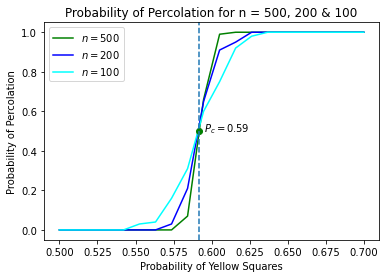

In [61]:
Pc_at_0_5(100, 500, 200, 100, generate_grid)

Again we plot $F_n$ but in this case to estimate $P_c$ we find the probability corresponding to the value of $F_n$ at which there was the greatest increase for the next probability.

In [22]:
# This function plots Fn against the yellow probabilities for 3 grid sizes
# It also finds an estimate of Pc by finding the greatest gradient between values of Fn
# i.e. where the probability of a path from left to right changes the most
def greatest_gradient_Pc(trials, n1, n2, n3, grid_type):
    
    # We find Fn at all 3 n's for 20 equally spaced probabilities between 0.5 and 0.7
    x_vals = np.linspace(0.5, 0.7, 20)    
    y_vals1 = np.array([Fn(trials, n1, p, grid_type) for p in x_vals])
    y_vals2 = np.array([Fn(trials, n2, p, grid_type) for p in x_vals])
    y_vals3 = np.array([Fn(trials, n3, p, grid_type) for p in x_vals])
    
    # We find the index of the yellow probability at which there is the greatest increase in Fn
    # This is the index of our estimate of Pc in this function
    Pc_idx = np.argmax(y_vals1[1:] - y_vals1[:-1])
    
    # Plot of all three curves of Fn and our estimate of Pc
    plt.plot(x_vals, y_vals1, color='green', label=f'$n={n1}$')
    plt.plot(x_vals, y_vals2, color='blue', label=f'$n={n2}$')
    plt.plot(x_vals, y_vals3, color='cyan', label=f'$n={n3}$')
    plt.plot(x_vals[Pc_idx], y_vals1[Pc_idx],'o', color = 'green')
    plt.text(x_vals[Pc_idx]+0.018, y_vals1[Pc_idx], f"$P_c = {x_vals[Pc_idx]:.2f}$", ha="center")
    plt.axvline(x_vals[Pc_idx], ls='--')
    plt.xlabel("Probability of Yellow Squares")
    plt.ylabel("Probability of Percolation")
    plt.title(f"Probability of Percolation for n = {n1}, {n2} & {n3}")
    plt.legend()

Below is the $F_n$ plot as before but using our new method of estimating $P_c$.

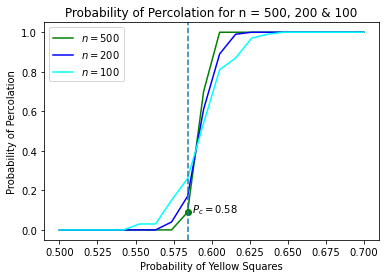

In [23]:
greatest_gradient_Pc(100, 500, 200, 100, generate_grid)

Our next method for estimating $P_c$ uses the intercept of the $F_n$ curves for the two largest $n$'s that we plot

In [56]:
# This function plots Fn against the yellow probabilities for 3 grid sizes
# It also finds an estimate of Pc by finding the the intercept of the two Fn curves with the greatest n
def intercept_Pc(trials, n1, n2, n3, grid_type):
    
    # We find Fn at all 3 n's for 20 equally spaced probabilities between 0.5 and 0.7
    x_vals = np.linspace(0.5, 0.7, 20)
    y_vals1 = np.array([Fn(trials, n1, p, grid_type) for p in x_vals])
    y_vals2 = np.array([Fn(trials, n2, p, grid_type) for p in x_vals])
    y_vals3 = np.array([Fn(trials, n3, p, grid_type) for p in x_vals])
    
    # We create two interpolated splines to fit the values of Fn to smooth curves
    spline1 = inter.InterpolatedUnivariateSpline(x_vals, y_vals1)
    spline2 = inter.InterpolatedUnivariateSpline(x_vals, y_vals2)
    
    # This function finds the value of the difference between our two splines at a given point x
    def difference(x):
        return spline1(x) - spline2(x)
    
    # We use the 'brentq' method to find the roots of our difference function in the region [0.58,0.60].
    # The roots of this function are when our two splines are equal - the intercept of the two.
    # This is our estimate for Pc
    intercept = opt.brentq(difference, 0.58, 0.6)
    
    # Plot of all three curves of Fn and our estimate of Pc
    plt.plot(x_vals, y_vals1, color='green', label=f'$n={n1}$')
    plt.plot(x_vals, y_vals2, color='blue', label=f'$n={n2}$')
    plt.plot(x_vals, y_vals3, color='cyan', label=f'$n={n3}$')
    plt.plot(intercept, spline1(intercept),'o', color = 'green')
    plt.text(intercept+0.018, spline1(intercept), f"$P_c = {intercept:.2f}$", ha="center")
    plt.axvline(intercept, ls='--')
    plt.xlabel("Probability of Yellow Squares")
    plt.ylabel("Probability of Percolation")
    plt.title(f"Probability of Percolation for n = {n1}, {n2} & {n3}")
    plt.legend()

Below is an estimate of $P_c$ using the new method above:

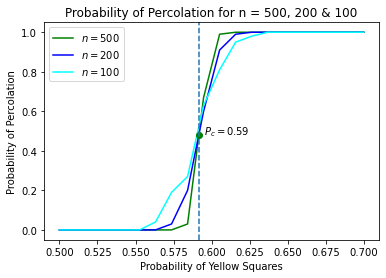

In [58]:
intercept_Pc(100, 500, 200, 100, generate_grid)

# Part 5 (further): Rectangular Grids of Sizes $2n \times n$ & $3n \times 2n$

We now want to generate grids of different sizes. The below functions create yellow and blue grids of sizes $2n\times n$ and $3n\times 2n$

In [32]:
# generate a 2n by n grid
def generate_2nxn(n, p_yellow):
    
    colours = np.random.rand(n, 2*n)  # Initialise 2d array of random numbers between 0 and 1
    colours = colours < p_yellow  # Sets each cell to True if it's less than p_yellow, else False.
    return colours

# generate a 3n by 2n grid
def generate_3nx2n(n, p_yellow):
    
    colours = np.random.rand(2*n, 3*n)  # Initialise 2d array of random numbers between 0 and 1
    colours = colours < p_yellow  # Sets each cell to True if it's less than p_yellow, else False.
    return colours

We can see these grids below:

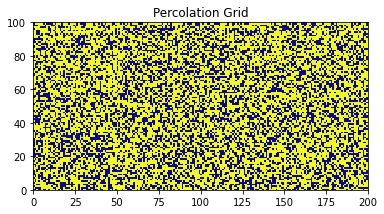

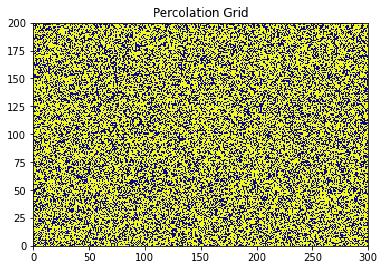

In [33]:
grid_2nxn = generate_2nxn(100, 0.6)

grid_3nx2n = generate_3nx2n(100, 0.6)

display_grid(grid_2nxn)

display_grid(grid_3nx2n)

We will now estimate $P_c$ again but this time for a path from left to right on these recatangular grids. As you can see from the plot below our estimate is the same to $2$ d.p. using the `intercept_Pc` function. Here the argument `grid_type` is useful as we can change the shape of our generated grids.

In [ ]:
intercept_Pc(100, 500, 200, 100, generate_2nxn)

intercept_Pc(100, 500, 200, 100, generate_3nx2n)

# Part 6 (further): Investigating $G_n(p)$ - the Probability of a Path from the Centre of the Grid to the Boundary

We will now look at new probability $G_n(p)$ defined as follows:\
$G_n(p) = \mathbb{P}$(there is a yellow path connecting the centre of the grid to the boundary)\
Its limit is then $G(p) = \lim_{n\to\infty} G_n(p)$

In [41]:
# This function finds a yellow path from the centre square to the boundary of the grid
def path_from_centre(grid):
    
    # we find the size of the grid and initialise variables giving us the side lengths
    grid_size = np.shape(grid)
    x_length = grid_size[1]
    y_length = grid_size[0]
    #we make an array of the same size as the grid to store
    #which squares we can reach. Initially we assume we can't reach any
    #0 represents a square is unreachable
    reachable = np.full(grid_size, 0)
    
    # 'yellows' is a list of arrays which contain the coordinates of each yellow square
    yellows = np.argwhere(grid == True)

    # The coordinates of the square in the centre of the grid.
    # If the grid has even length sides then there is no exact centre so we use a nearest square
    centre = ((y_length+1)//2, (x_length+1)//2)
    
    # If the centre of the grid is yellow then we assign 1 to it's position in reachable
    # and update our array of reachable squares. Otherwise we return False immediately
    if centre in yellows:
        reachable[centre] = 1
        reachable_array = np.asarray(np.where(reachable == 1)).T.tolist()
    else:
        return False
    
    # # now we search for adjacent yellow squares to the ones we already have
    # we iterate over our array of coordinates of reachable squares.
    for square in reachable_array:

        # we assign y and x for each squares so that we can later compare to adjacent sites
        y = square[0]
        x = square[1]

        # We define the boundary as the combination of the columns and rows at the edges of the grid
        boundary = np.concatenate((reachable[:,x_length-1], reachable[:,0], reachable[0,:], reachable[y_length-1,:]))

        # As soon as a site on the RHS is shown to be reachable we return True
        if 1 in boundary:
            #display_grid(reachable)
            return True
        #check adjacent
        #the first ifs in each part stops us getting index out of bounds errors
        #we check !=1 because otherwise we'd find the same squares again
        #and it would loop forever
        else:
            if x<x_length-1:
                #checks right
                if grid[y,x+1] == True and reachable[y,x+1] != 1:
                    reachable[y,x+1] = 1
                    reachable_array.append([y,x+1])
            if y-1>=0:
                #checks below
                if grid[y-1,x] == True and reachable[y-1,x] != 1:
                    reachable[y-1,x] = 1
                    reachable_array.append([y-1,x])
            if y<y_length-1:
                #checks above
                if grid[y+1,x] == True and reachable[y+1,x] != 1:
                    reachable[y+1,x] = 1
                    reachable_array.append([y+1,x])
            if x-1>=0:
                #checks left
                if grid[y,x-1] == True and reachable[y,x-1] != 1:
                    reachable[y,x-1] = 1
                    reachable_array.append([y,x-1])
    #display_grid(reachable)
    return False

Below we find a path from the centre square to the boundary, using a square grid with odd length sides and displaying the squares that we checked to be reachable during this process.

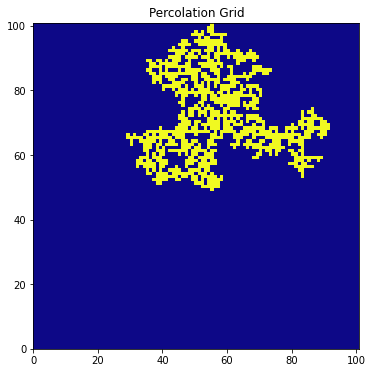

True

In [39]:
odd_grid = generate_grid(101, 0.6)

path_from_centre(odd_grid)

The two cells below show that finding a path from the centre to the boundary is quicker than from the left to the right. This is because there are four sides to reach. In this case there was a path for `odd_grid` but if we run our this on new grids each time our performance results will be slightly skewed by the fact that if the centre square is generated as blue then `path_from_centre` immediately returns False, meaning no computation of the path is required.

In [42]:
%timeit path_from_centre(odd_grid)

32.5 ms ± 2.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
%timeit find_path_across(odd_grid)

108 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Part 12 (Advanced): Parrallel Wires Percolation Model with Poisson Break and Connection Rates

The code below attempts to compute the following percolation model. We have infinitely many equally
spaced parallel wires. Each wire has breaks according to a Poisson process. Each adjacent
pair of wires has bridges connecting them according to a Poisson process.

In [66]:
# function to create the breaks and connections lists using the rest of the data
def create_wires(height, num_wires, poisson_breaks, poisson_connections):
    
    # number of wires to apply breaks to
    n_breaks = num_wires - 2
    # number of wires to apply connections to
    n_connections = n_breaks + 1
    # this section creates list of breaks in wires
    # initializes a list of empty lists required for each wire
    breaks = [[] for x in range(n_breaks)]
    # for each of the wires except the first and last (since breaks in those wouldn't matter)
    for i in range(0, n_breaks):
        # get a running total starting at 0 (representing the bottom of the wire)
        total = 0
        # until we pass the top of the wire
        while total < height:
            # get a random exponential as the gap between the previous break and the next one
            gap = np.random.exponential(poisson_breaks)
            # add it to the total
            total += gap
            # if you're still on the wire
            if total < height:
                # add the y coord of the break to the list
                breaks[i].append(total)

    # some notes:
    # We don't add breaks in the first or last wires as the whole first wire is powered anyway and therefore adding
    # breaks wouldn't change anything, and in the last wire, we only care if any point of it is powered.
    # Also, while it seems pointless to check if total < height again inside the while loop, if I didn't do that then
    # it would add an extra break to the list that would be greater than the height. I could fix this by then removing
    # the last one afterwards, but that would make the code less readable (although slightly more efficient).

    # this section creates list of connections between wires
    # initializes a list of empty lists required for each wire
    connections = [[] for x in range(n_connections)]
    # for each gap between the wires (so number of wires - 1)
    for i in range(0, n_connections):
        # make running total
        total = 0
        # very similar to the previous one
        while total < height:
            gap = np.random.exponential(poisson_connections)
            total += gap
            if total < height:
                connections[i].append(total)

    return breaks, connections

In [60]:
# function to draw the wires and breaks on a graph using the breaks and connections
def draw_wires(height, num_wires, breaks, connections):

    plt.figure(figsize=(7, 7))
    # gets x coords for vertical wires and puts them in a numpy array
    vertical_lines = np.arange(0, num_wires, 1)
    # plots the vertical wires
    plt.vlines(vertical_lines, 0, height, colors="k")

    # for each of the gaps between the wires
    for i in range(0, num_wires - 1):
        # draw horizontal lines on the y coords of each of the connections going between the wires
        plt.hlines(connections[i], i, i+1, colors="k")

    # break_width*2 is a nice width for the red lines that represent breaks in the wires
    break_width = 1/3
    # for each of the wires that aren't first or last
    for i in range(0, num_wires - 2):
        # draw horizontal lines on the wires where the breaks are
        plt.hlines(breaks[i], i+1 - break_width, i+1 + break_width, colors="r", lw=1)

    # plot and show the graph
    plt.plot()
    plt.show()

In [61]:
# similar to the previous function but instead uses vertical segments and horizontal segments, and also
# draws any of the wires that are assigned as reachable in cyan rather than black
def draw_wires_reachable(num_wires, verticals, horizontals, breaks):
    # makes figure a nice size
    plt.figure(figsize=(7, 7))
    # for each of the vertical wires
    for x in range(0, len(verticals)):
        # for each of the segments of vertical wire in the current wire
        for y in range(0, len(verticals[x])):
            # if it's powered
            if verticals[x][y][2] == 1:
                # draw it in cyan
                plt.vlines(x, verticals[x][y][0], verticals[x][y][1], colors="c")
            else:
                # if it's not powered draw it in black
                plt.vlines(x, verticals[x][y][0], verticals[x][y][1], colors="k")

    # for each of the gaps
    for x in range(0, len(horizontals)):
        # for each of the horizontal wires in the gap
        for y in range(0, len(horizontals[x])):
            # if it's powered
            if horizontals[x][y][1] == 1:
                # draw it in cyan
                plt.hlines(horizontals[x][y][0], x, x + 1, colors="c")
            else:
                # otherwise draw it in black
                plt.hlines(horizontals[x][y][0], x, x + 1, colors="k")

    # draws each of the breaks (same as previous function)
    break_width = 1/3
    for i in range(0, num_wires - 2):
        plt.hlines(breaks[i], i+1 - break_width, i + 1 + break_width, colors="r", lw=1)

    # plot and show graph
    plt.plot()
    plt.show()

In [62]:
# this function looks at all the horizontal wires, sees if they should be powered, and if so, powers them
def power_horizontals(verticals, horizontals):
    # changed sees if you end up changing any; if you don't turn any wires on then you are stuck forever and should stop
    changed = False
    # for each of the gaps (except the first, which all of them will be powered anyway since they're directly
    # connected to the first vertical wire which is powered)
    for x in range(1, len(horizontals)):
        # for all the horizontal wires in the gap
        for y in range(0, len(horizontals[x])):
            # if it's not powered
            if horizontals[x][y][1] == 0:
                # go through each of the vertical segments to the left
                for i in range(0, len(verticals[x])):
                    # loop until you find the one that the horizontal one is connected to
                    if verticals[x][i][1] > horizontals[x][y][0]:
                        # if that vertical segment is powered
                        if verticals[x][i][2] == 1:
                            # then power the horizontal wire
                            horizontals[x][y][1] = 1
                            # and since you've powered a wire, the state has changed, and we need to keep going
                            changed = True
                        # then either way stop looping, since any of the next vertical segments won't be connected
                        break

                # does the same as the previous section but checking the vertical wire segment on the right instead
                for i in range(0, len(verticals[x + 1])):
                    if verticals[x + 1][i][1] > horizontals[x][y][0]:
                        if verticals[x + 1][i][2] == 1:
                            horizontals[x][y][1] = 1
                            changed = True
                        break

    return horizontals, changed

In [63]:
# this function looks at each of the vertical segments, sees if they should get powered, and if so, powers them
def power_verticals(verticals, horizontals):
    # this is used to see if the final wire has been powered
    final_powered = False
    # for each of the long vertical wires (except the first which is always powered)
    for x in range(1, len(verticals)):
        # for each of the vertical wire segments
        for y in range(0, len(verticals[x])):
            # if the current segment is unpowered
            if verticals[x][y][2] == 0:
                # go through each of the horizontal wire segments to the left
                for i in range(0, len(horizontals[x - 1])):
                    # if the current horizontal segment is above the bottom part of the wire
                    if horizontals[x - 1][i][0] > verticals[x][y][0]:
                        # and it's below the top part of the wire
                        if horizontals[x - 1][i][0] < verticals[x][y][1]:
                            # and it's powered
                            if horizontals[x - 1][i][1] == 1:
                                # then power the vertical segment
                                verticals[x][y][2] = 1
                                # if it's in the final wire
                                if x == len(verticals) - 1:
                                    # then the final wire is powered
                                    final_powered = True
                                # since the wire is powered, we don't need to check any of the other horizontal wires
                                break
                        # if it's above the top part of the wire, we've gone past and don't need to check any others
                        else:
                            break

                # here we do the same thing but for the horizontal wires coming from the right - first however,
                # we need to check that this isn't the last wire, otherwise we'd go outside the index range
                if x != len(verticals) - 1:
                    # then we basically just do the same thing
                    for i in range(0, len(horizontals[x])):
                        if horizontals[x][i][0] > verticals[x][y][0]:
                            if horizontals[x][i][0] < verticals[x][y][1]:
                                if horizontals[x][i][1] == 1:
                                    verticals[x][y][2] = 1
                                    break
                            else:
                                break

    return verticals, final_powered

In [64]:
# this function determines whether a given set of breaks and connections has a path going from left to right
def path_of_current(height, breaks, connections):
    # verticals and horizontals are similar to breaks and connections, with a slight difference.
    # for horizontals, all it does is add a boolean to each connection to represent whether the wire is powered.
    # for verticals, rather than storing the breaks, it instead stores the segments of wire that are formed from
    # each of the breaks - for example, if there was one break right in the middle, then verticals would have two
    # wires with start and end points, and also a boolean to represent whether the wire is on or off.

    # first off, we convert the breaks and connections to verticals and horizontals
    # initialise lists
    verticals = []
    horizontals = []

    # the first wire will always be [0, height, 1], since it has no breaks, so it goes from 0 to the height, and
    # it's always powered.
    verticals.append([[0, height, 1]])

    # for each of breaks in a specific wire
    for breaks_in_wire in breaks:
        # if there are no breaks in our wire
        if len(breaks_in_wire) == 0:
            # then our segment is the whole wire
            verticals.append([[0, height, 0]])
        else:
            # otherwise, the first segment will go from 0 to our first break
            current_verticals = [[0, breaks_in_wire[0], 0]]
            # then each of the next segments will just be from the current break to the next
            for i in range(0, len(breaks_in_wire) - 1):
                current_verticals.append([breaks_in_wire[i], breaks_in_wire[i + 1], 0])
            # except the last, which goes from the last break to the height
            current_verticals.append([breaks_in_wire[-1], height, 0])
            # then we add all the segments of wire to our verticals
            verticals.append(current_verticals)
    # the last wire, similar to the first, has no breaks
    verticals.append([[0, height, 0]])

    # this is identical to the next part, except each horizontal wire connected to the first vertical one
    # can automatically start off powered, so this saves a bit of time.
    current_horizontals = []
    for wire in connections[0]:
        current_horizontals.append([wire, 1])
    horizontals.append(current_horizontals)

    # for each of the gaps between the wires (except for the first for the reasons above)
    for gap in connections[1:]:
        current_horizontals = []
        # for each of the horizontal wires in the gap
        for wire in gap:
            # add the y coord of this wire, and 0 (because it's off), to a temporary list
            current_horizontals.append([wire, 0])
        # then add this temporary list to the list of lists of horizontal wires
        horizontals.append(current_horizontals)

    # now we can start checking if we can reach the end!
    # we keep repeating until one of two conditions are met - if the final wire is powered, then we are done and don't
    # need to check and more wires. However, if no new horizontal wires are powered, then that means no new vertical
    # wires will be powered, so no new wires will ever be powered. Therefore, the end is not reachable. If neither
    # of these are true then we need to keep looking.
    while True:
        # powers any vertical wires that needs powering, and gets whether the final wire is powered.
        verticals, final_powered = power_verticals(verticals, horizontals)
        # if it is, then we are done, and can return the wires (we could also return "True" if that will be helpful)
        if final_powered:
            return True, verticals, horizontals

        # then powers any horizontal wires that need powering, and whether or not the board changed state
        horizontals, changed = power_horizontals(verticals, horizontals)
        # if it didn't change, then we are stuck, so we give up and return what wires we did end up powering.
        if not changed:
            return False, verticals, horizontals

The cell below runs this percolation model for given grid sizes, break rates and connection rates until a grid with a path is found. We then display this grid with the path highlighted in cyan.

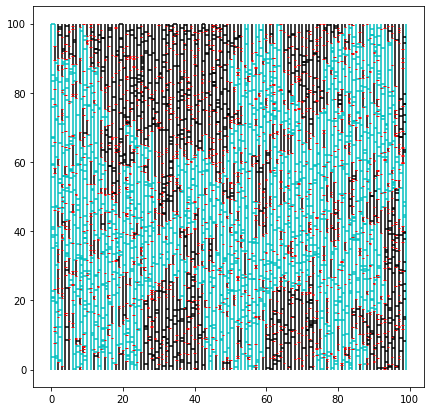

In [67]:
# some example variables
# height is how tall you want each wire to be
height = 100
# num_wires is how many vertical wires across the board you want
num_wires = 100
# break_rate is the random poisson variable used to see how frequently there should be breaks in the wires
break_rate = 4.8
# similarly connect_rate determines how frequently there should be connections between the wires
connect_rate = 5
# (the smaller the number, the more frequently it will happen)

# We keep trying random grids until we find one that can reach the end, then draw it.
# We made the break rate slightly faster than the connect rate for an interesting path.
while True:
    breaks, connections = create_wires(height, num_wires, break_rate, connect_rate)
    reachable, verts, horiz = path_of_current(height, breaks, connections)
    if reachable:
        draw_wires_reachable(num_wires, verts, horiz, breaks)
        break